In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
#rcParams['figure.figsize'] = (4.0,2.0)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Reading the original data
df_orig = pd.read_csv('C:/Users/DIPANNITA MOHANTY/OneDrive/Desktop/ML_Assignment/Churn_Modelling.csv')

In [5]:
df_orig

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [6]:
df_orig.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
#Copying the original data to a new data frame
df = df_orig.copy()

In [8]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [9]:
# Dropping the id and name columns.
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.head()

RowNumber  CreditScore Geography  Gender  Age  Tenure    Balance  \
0          1          619    France  Female   42       2       0.00   
1          2          608     Spain  Female   41       1   83807.86   
2          3          502    France  Female   42       8  159660.80   
3          4          699    France  Female   39       1       0.00   
4          5          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [11]:
# Converting NumOfProducts column to categorical.
df['NumOfProducts'] = df['NumOfProducts'].astype(int)
df['NumOfProducts'] = df['NumOfProducts'].astype(object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  object 
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [13]:
# Creating seperate columns for categories
df = pd.get_dummies(df)
df.head()

RowNumber  CreditScore  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0          1          619   42       2       0.00          1               1   
1          2          608   41       1   83807.86          0               1   
2          3          502   42       8  159660.80          1               0   
3          4          699   39       1       0.00          0               0   
4          5          850   43       2  125510.82          1               1   

   EstimatedSalary  Exited  Geography_France  Geography_Germany  \
0        101348.88       1                 1                  0   
1        112542.58       0                 0                  0   
2        113931.57       1                 1                  0   
3         93826.63       0                 1                  0   
4         79084.10       0                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  NumOfProducts_1  \
0                0              1            0                1   
1                1              1            0                1   
2                0              1            0                0   
3                0              1            0                0   
4                1              1            0                1   

   NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  
0                0                0                0  
1                0                0                0  
2                0                1                0  
3                1                0                0  
4                0                0                0

In [14]:
# Dropping excess columns
df.drop('Geography_Spain', axis=1, inplace=True)
df.drop('Gender_Male', axis=1, inplace=True)
df.drop('NumOfProducts_2', axis=1, inplace=True)
df.head()

RowNumber  CreditScore  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0          1          619   42       2       0.00          1               1   
1          2          608   41       1   83807.86          0               1   
2          3          502   42       8  159660.80          1               0   
3          4          699   39       1       0.00          0               0   
4          5          850   43       2  125510.82          1               1   

   EstimatedSalary  Exited  Geography_France  Geography_Germany  \
0        101348.88       1                 1                  0   
1        112542.58       0                 0                  0   
2        113931.57       1                 1                  0   
3         93826.63       0                 1                  0   
4         79084.10       0                 0                  0   

   Gender_Female  NumOfProducts_1  NumOfProducts_3  NumOfProducts_4  
0              1                1                0                0  
1              1                1                0                0  
2              1                0                1                0  
3              1                0                0                0  
4              1                1                0                0

In [15]:
df.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [16]:
df = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited']] 

In [17]:
# Correlation Matrix
corr = df.corr()
corr.style.background_gradient()


In [18]:
# Converting all Balances more than 0 to 1
df['Balance'] = df['Balance'].clip(upper=1)

In [19]:
df.drop('EstimatedSalary', axis=1, inplace=True)
df.drop('HasCrCard', axis=1, inplace=True)
#df.drop('NumOfProducts', axis=1, inplace=True)
df.drop('Tenure', axis=1, inplace=True)
df.head()

CreditScore  Age  Balance  IsActiveMember  Geography_Germany  \
0          619   42      0.0               1                  0   
1          608   41      1.0               1                  0   
2          502   42      1.0               0                  0   
3          699   39      0.0               0                  0   
4          850   43      1.0               1                  0   

   Geography_France  Gender_Female  NumOfProducts_1  NumOfProducts_4  \
0                 1              1                1                0   
1                 0              1                1                0   
2                 1              1                0                0   
3                 1              1                0                0   
4                 0              1                1                0   

   NumOfProducts_3  Exited  
0                0       1  
1                0       0  
2                1       1  
3                0       0  
4                0       0

In [20]:
df = df.applymap(np.int64)

In [21]:
df.loc[df.Balance == 0, 'Balance'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.loc[df.Geography_Germany == 0, 'Geography_Germany'] = -1
df.loc[df.Geography_France == 0, 'Geography_France'] = -1
df.loc[df.Gender_Female == 0, 'Gender_Female'] = -1
df.loc[df.NumOfProducts_1 == 0, 'NumOfProducts_1'] = -1
df.loc[df.NumOfProducts_3 == 0, 'NumOfProducts_3'] = -1
df.loc[df.NumOfProducts_4 == 0, 'NumOfProducts_4'] = -1
df.loc[df.Exited == 0, 'Exited'] = -1
df.head()

CreditScore  Age  Balance  IsActiveMember  Geography_Germany  \
0          619   42       -1               1                 -1   
1          608   41        1               1                 -1   
2          502   42        1              -1                 -1   
3          699   39       -1              -1                 -1   
4          850   43        1               1                 -1   

   Geography_France  Gender_Female  NumOfProducts_1  NumOfProducts_4  \
0                 1              1                1               -1   
1                -1              1                1               -1   
2                 1              1               -1               -1   
3                 1              1               -1               -1   
4                -1              1                1               -1   

   NumOfProducts_3  Exited  
0               -1       1  
1               -1      -1  
2                1       1  
3               -1      -1  
4               -1      -1

In [22]:
# Scaling the data
from sklearn.preprocessing import scale

df['CreditScore'] = scale(df['CreditScore'])
df['Age'] = scale(df['Age'])
#df['Tenure'] = scale(df['Tenure'])
#df['NumOfProducts'] = scale(df['NumOfProducts'])

df.head()

CreditScore       Age  Balance  IsActiveMember  Geography_Germany  \
0    -0.326221  0.293517       -1               1                 -1   
1    -0.440036  0.198164        1               1                 -1   
2    -1.536794  0.293517        1              -1                 -1   
3     0.501521  0.007457       -1              -1                 -1   
4     2.063884  0.388871        1               1                 -1   

   Geography_France  Gender_Female  NumOfProducts_1  NumOfProducts_4  \
0                 1              1                1               -1   
1                -1              1                1               -1   
2                 1              1               -1               -1   
3                 1              1               -1               -1   
4                -1              1                1               -1   

   NumOfProducts_3  Exited  
0               -1       1  
1               -1      -1  
2                1       1  
3               -1      -1  
4               -1      -1

In [23]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3', 'Exited'],
      dtype='object')

In [24]:
X = df[['CreditScore', 'Age', 'Balance', 'IsActiveMember', 'Geography_Germany',
       'Geography_France', 'Gender_Female', 'NumOfProducts_1',
       'NumOfProducts_4', 'NumOfProducts_3']]
y = df['Exited']

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (11).

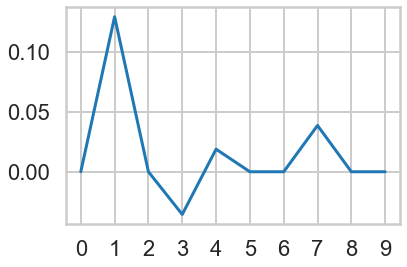

In [25]:
# Using Lasso to know features significance.
from sklearn.linear_model import Lasso
names = df.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)-1), lasso_coef)
plt.xticks(range(len(names)-1), names, rotation=60)

In [31]:
#Over Sampling using SMOTE
from imblearn.over_sampling import SMOTE


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\DIPANNITA MOHANTY\anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [28]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

NameError: name 'SMOTE' is not defined